In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns




import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 엑셀 파일 불러오기

df = pd.read_excel("C:/Users/hanyo/Downloads/archive/car_evaluation.xlsx", engine="openpyxl")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.columns

Index(['vhigh', 'vhigh.1', 2, '2.1', 'small', 'low', 'unacc'], dtype='object')

In [5]:
df['unacc'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64

In [6]:
print("결측치 개수 확인:\n", df.isnull().sum())

결측치 개수 확인:
 vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [7]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

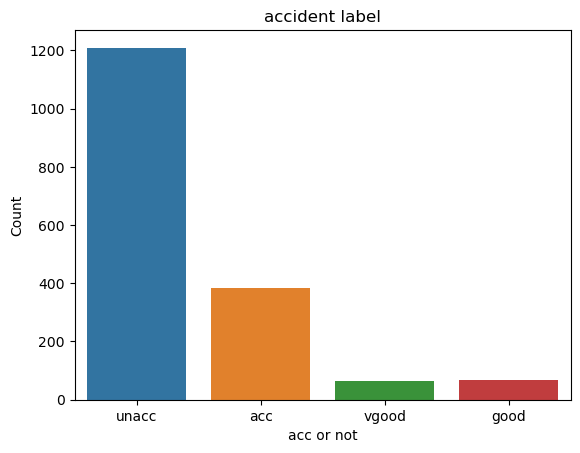

unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64

In [8]:
# 레이블 확인 (그래프, 숫자)

sns.countplot(data = df, x="unacc")
plt.xlabel("acc or not")
plt.ylabel("Count")
plt.title("accident label")

plt.show()

df['unacc'].value_counts()

In [9]:
df.columns

Index(['vhigh', 'vhigh.1', 2, '2.1', 'small', 'low', 'unacc'], dtype='object')

In [10]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [11]:
# 무관한 칼럼 제거하기
columns_to_drop = ['2.1',2]
df = df.drop(columns=columns_to_drop, errors='ignore')
df

,vhigh,vhigh.1,small,low,unacc
0,vhigh,vhigh,small,med,unacc
1,vhigh,vhigh,small,high,unacc
2,vhigh,vhigh,med,low,unacc
3,vhigh,vhigh,med,med,unacc
4,vhigh,vhigh,med,high,unacc
...,...,...,...,...,...
1722,low,low,med,med,good
1723,low,low,med,high,vgood
1724,low,low,big,low,unacc
1725,low,low,big,med,good


In [13]:
# 인코딩
encoder = LabelEncoder()
categorical_cols = ['vhigh','vhigh.1','small','low','unacc']  # 변환할 칼럼 입력
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("\n변환 후 'unacc' 분포:\n", df['unacc'].value_counts())

# 최종 데이터 확인
print("\n 데이터 전처리 완료! 데이터프레임 미리보기:")
df


변환 후 'unacc' 분포:
 2    1209
0     384
1      69
3      65
Name: unacc, dtype: int64

 데이터 전처리 완료! 데이터프레임 미리보기:


,vhigh,vhigh.1,small,low,unacc
0,3,3,2,2,2
1,3,3,2,0,2
2,3,3,1,1,2
3,3,3,1,2,2
4,3,3,1,0,2
...,...,...,...,...,...
1722,1,1,1,2,1
1723,1,1,1,0,3
1724,1,1,0,1,2
1725,1,1,0,2,1


In [14]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [17]:
X=df.drop('unacc',axis=1)
y=df['unacc']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7268518518518519
[[ 18   0  78   0]
 [  0   3  10   5]
 [ 10   0 278  10]
 [  0   0   5  15]]


In [19]:
 # Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6898148148148148
[[  0   0  96   0]
 [  0   0  18   0]
 [  0   0 298   0]
 [  0   0  20   0]]


In [20]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.7361111111111112
[[ 36   3  57   0]
 [  3  10   2   3]
 [ 20   8 263   7]
 [  3   0   8   9]]


C:\Users\hanyo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7777777777777778
[[ 76   4  16   0]
 [  0  10   6   2]
 [ 42  10 236  10]
 [  2   3   1  14]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7731481481481481
[[ 70   3  23   0]
 [  0   8   4   6]
 [ 40   8 238  12]
 [  2   0   0  18]]
